In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('gym_data.csv')

In [3]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
number_people           62184 non-null int64
date                    62184 non-null object
timestamp               62184 non-null int64
day_of_week             62184 non-null int64
is_weekend              62184 non-null int64
is_holiday              62184 non-null int64
temperature             62184 non-null float64
is_start_of_semester    62184 non-null int64
is_during_semester      62184 non-null int64
month                   62184 non-null int64
hour                    62184 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [5]:
corr = df.corr()

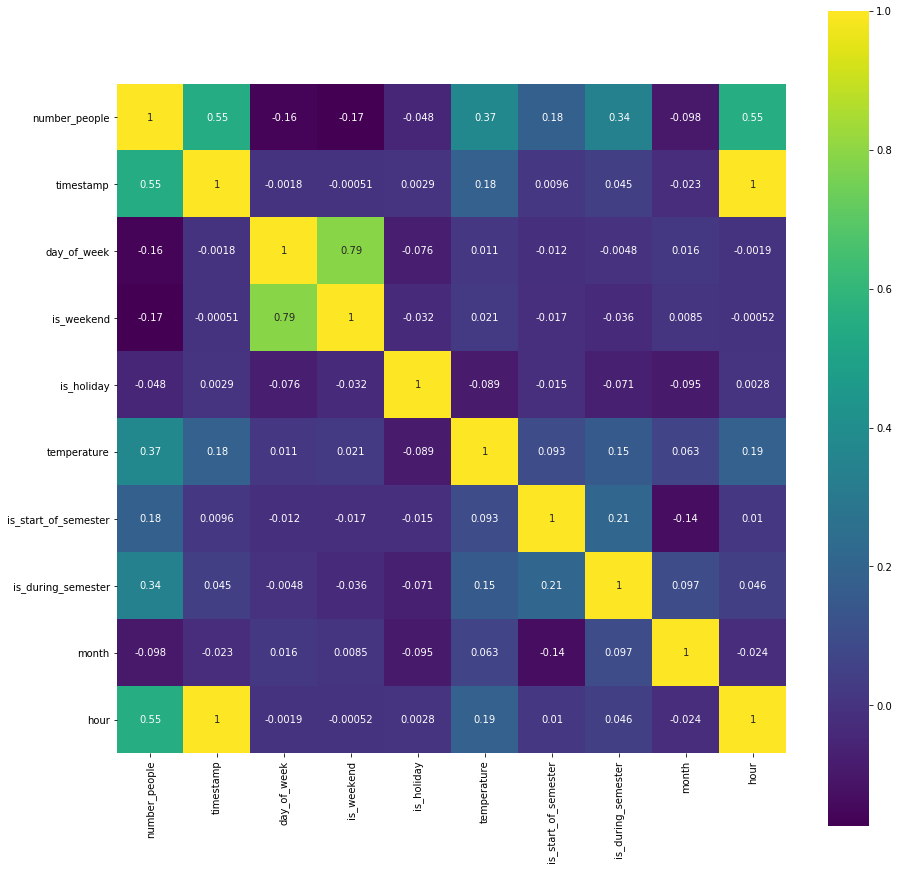

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,square=True,annot=True,cmap='viridis')

In [6]:
X = df.iloc[:,1:8]

In [7]:
y = df.iloc[:, 0]

In [8]:
X=X.drop(['timestamp','date'],axis=1)


In [9]:
columns = X.columns.values

In [10]:
columns

array(['day_of_week', 'is_weekend', 'is_holiday', 'temperature',
       'is_start_of_semester'], dtype=object)

In [11]:
#standard scaler scale the value between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.50956119, -0.6280507 , -0.05079022,  2.09027384, -0.29253482],
       [ 0.50956119, -0.6280507 , -0.05079022,  2.09027384, -0.29253482],
       [ 0.50956119, -0.6280507 , -0.05079022,  2.09027384, -0.29253482],
       ...,
       [ 1.01036016,  1.59222814, -0.05079022, -0.292433  , -0.29253482],
       [ 1.01036016,  1.59222814, -0.05079022, -0.292433  , -0.29253482],
       [ 1.01036016,  1.59222814, -0.05079022, -0.292433  , -0.29253482]])

In [13]:
pca = PCA()
pca.fit_transform(X)

array([[-0.00523801, -1.31536715, -0.28474253,  1.61527268,  0.83132363],
       [-0.00523801, -1.31536715, -0.28474253,  1.61527268,  0.83132363],
       [-0.00523801, -1.31536715, -0.28474253,  1.61527268,  0.83132363],
       ...,
       [-1.82887918,  0.45545298, -0.06290471, -0.05805843, -0.41246479],
       [-1.82887918,  0.45545298, -0.06290471, -0.05805843, -0.41246479],
       [-1.82887918,  0.45545298, -0.06290471, -0.05805843, -0.41246479]])

In [14]:
explained_variance=pca.explained_variance_ratio_

In [15]:
explained_variance

array([0.36001919, 0.22673146, 0.19595154, 0.17584091, 0.04145689])

In [16]:
explained_variance.sum()

1.0

<BarContainer object of 5 artists>

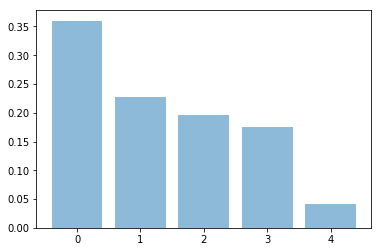

In [17]:
plt.bar(range(5), explained_variance, alpha=0.5, align='center', label='individual explained variance')

In [65]:
explained_variance.sum()

1.0

In [18]:
pca = PCA(n_components=2)
pca.fit_transform(X)
#principalComponents = pca.fit_transform(X)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

array([[-0.00523801, -1.31536715],
       [-0.00523801, -1.31536715],
       [-0.00523801, -1.31536715],
       ...,
       [-1.82887918,  0.45545298],
       [-1.82887918,  0.45545298],
       [-1.82887918,  0.45545298]])

In [19]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.36001919, 0.22673146])

In [21]:
explained_variance.sum()

0.5867506493332136

<BarContainer object of 2 artists>

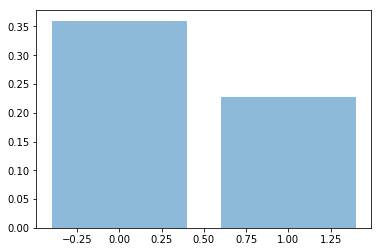

In [20]:
plt.bar(range(2), explained_variance, alpha=0.5, align='center', label='individual explained variance')

In [69]:
#finalDf = pd.concat([principalDf, y], axis = 1)


In [70]:
#finalDf

In [71]:
#plt.scatter(finalDf['principal component 1'] , finalDf['principal component 2'] , c = 'black' )
#plt.scatter(finalDf['number_people'],color='red')

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(49747, 5)

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [29]:
estimators = np.arange(10, 200, 10)
estimators

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])

In [30]:
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)    

[0.6285232308654458, 0.6340558458129725, 0.6336726811424712, 0.6335313847974975, 0.6331515630516298, 0.6338777936667652, 0.6338464779793573, 0.6337031797212235, 0.6344844064897938, 0.63380737331204, 0.6344305724390711, 0.6341079913399832, 0.6346480153919904, 0.6345927291233402, 0.6341379072548204, 0.6341240477991024, 0.6345872018295792, 0.634394606639598, 0.6340887532920318]


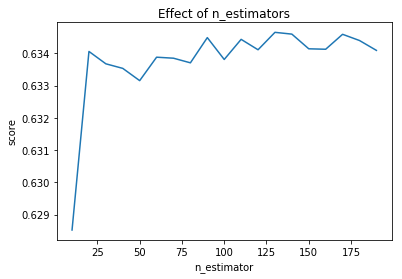

In [31]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)